In [ ]:
# https://github.com/google-coral/tutorials/blob/master/train_lstm_timeseries_ptq_tf2.ipynb

# https://colab.research.google.com/github/google-coral/tutorials/blob/master/train_lstm_timeseries_ptq_tf2.ipynb#scrollTo=6qO3pJejSeRI


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [93]:
# read data

# dataset
## import datetime
dt = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\datetime.csv', delimiter=';')
#Time

## import variables
df = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_ffill.csv', delimiter=';')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Time'], axis=1)

df.tail()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
787616,9.8,12.3,30.1,37.9,34.1,30.6,31.1,17.6,77.50,39.05,...,53.0,4.15,10.70,40.0,0.0,37.0,23.3,11.1,10.7,7.7
787617,9.4,11.9,30.1,38.0,34.1,30.6,31.1,17.6,78.15,39.80,...,54.5,4.60,9.30,40.0,0.0,37.2,24.4,10.8,10.7,7.9
787618,8.9,11.4,30.1,37.7,34.1,30.6,31.1,17.6,77.70,39.45,...,55.5,5.20,9.20,40.0,0.0,37.6,23.1,10.6,10.7,7.7
787619,8.3,10.7,30.4,38.2,34.4,30.6,31.4,17.6,77.70,40.00,...,55.0,6.20,8.25,40.0,0.0,37.6,24.2,10.3,10.7,7.9
787620,7.1,9.6,30.1,37.9,34.4,30.6,31.4,17.6,76.80,39.50,...,55.0,7.50,7.70,40.0,0.0,37.6,23.4,9.9,10.4,7.6


In [94]:
dt = pd.to_datetime(dt['Time'], format='%Y-%m-%d %H:%M:%S')
dt = dt[:787621]
dt.tail()

787616   2021-06-30 23:56:00
787617   2021-06-30 23:57:00
787618   2021-06-30 23:58:00
787619   2021-06-30 23:59:00
787620   2021-07-01 00:00:00
Name: Time, dtype: datetime64[ns]

In [95]:
titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']
selected_titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']

In [96]:
df = df[selected_titles][:527041]
dt = dt[:527041]

In [ ]:
#df.head()

In [97]:
dataset = pd.concat([dt,df], axis = 1)
dataset.head()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,2020-01-01 00:00:00,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,...,40.0,32.0,31.0,100.0,14.5,32.6,24.9,5.9,24.8,5.9
1,2020-01-01 00:01:00,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,...,40.0,32.0,31.0,100.0,14.6,32.6,24.9,5.9,24.8,5.9
2,2020-01-01 00:02:00,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,...,40.0,32.0,31.0,100.0,14.6,32.7,24.9,5.9,24.8,5.9
3,2020-01-01 00:03:00,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,...,40.0,32.0,30.9,100.0,14.5,32.7,24.9,5.9,24.8,5.9
4,2020-01-01 00:04:00,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,...,40.0,32.0,31.0,100.0,14.5,32.7,24.9,5.9,24.8,5.9


In [ ]:
# drop the target - superheat_c1
#x = df.drop(columns=['superheat_c1'], axis=1)

In [ ]:
feature_keys = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3',	'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3',	'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2']#, 'superheat_c1', 'superheat_c2']

title = ['°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C','°C', 'Status', 'Status', 'Status', 'Status', '%', '%', '%', '%']#, 'K', 'K']

date_time = 'Time'

def visualization(data):
    time_data = data[date_time]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax = axes[i//2,i%2],
            title ='{}-{}'.format(title[i], key),
            rot = 25,
        )
        ax.legend([title[i]])
    plt.tight_layout()

visualization(dataset)

In [98]:
#input
df_input =df[['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']]

df_output = df[['pressure_t2.c1']]
df.head()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,42.2000,...,40.0,32.0,31.0,100.0,14.5,32.6,24.9,5.9,24.8,5.9
1,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,42.2000,...,40.0,32.0,31.0,100.0,14.6,32.6,24.9,5.9,24.8,5.9
2,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,42.2125,...,40.0,32.0,31.0,100.0,14.6,32.7,24.9,5.9,24.8,5.9
3,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,42.2300,...,40.0,32.0,30.9,100.0,14.5,32.7,24.9,5.9,24.8,5.9
4,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,42.2000,...,40.0,32.0,31.0,100.0,14.5,32.7,24.9,5.9,24.8,5.9


In [99]:
# normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(df)


print(features)

[[0.37435897 0.40909091 0.73819742 ... 0.22105263 0.6967509  0.44776119]
 [0.37435897 0.40909091 0.74248927 ... 0.22105263 0.6967509  0.44776119]
 [0.37435897 0.40909091 0.73819742 ... 0.22105263 0.6967509  0.44776119]
 ...
 [0.26666667 0.33766234 0.54935622 ... 0.30526316 0.6101083  0.50746269]
 [0.26666667 0.33766234 0.54935622 ... 0.30526316 0.6101083  0.50746269]
 [0.27692308 0.33766234 0.54935622 ... 0.41052632 0.51624549 0.52985075]]


In [100]:
features = pd.DataFrame(features)
features.columns = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']

features.head()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,0.374359,0.409091,0.738197,0.785714,0.798804,0.779130,0.185811,0.325088,0.854370,0.742857,...,0.571429,0.415584,0.38750,1.0,0.161458,0.569892,0.765957,0.221053,0.696751,0.447761
1,0.374359,0.409091,0.742489,0.785714,0.799045,0.779130,0.190121,0.325088,0.853328,0.742857,...,0.571429,0.415584,0.38750,1.0,0.164062,0.569892,0.765957,0.221053,0.696751,0.447761
2,0.374359,0.409091,0.738197,0.785714,0.799891,0.780870,0.188836,0.325088,0.852579,0.743304,...,0.571429,0.415584,0.38750,1.0,0.164062,0.573477,0.765957,0.221053,0.696751,0.447761
3,0.374359,0.409091,0.742489,0.785714,0.798586,0.780522,0.188762,0.325088,0.853458,0.743929,...,0.571429,0.415584,0.38625,1.0,0.161458,0.573477,0.765957,0.221053,0.696751,0.447761
4,0.374359,0.409091,0.742489,0.785714,0.799347,0.779130,0.186226,0.325088,0.854484,0.742857,...,0.571429,0.415584,0.38750,1.0,0.161458,0.573477,0.765957,0.221053,0.696751,0.447761


In [101]:
# split the data
split_fraction = 0.8
train_split = int(split_fraction * int(dataset.shape[0]))
step = 6

#window_size
past = 720 # half a day
future = 5

## scale values 
#def normalize(data, train_split):
#    data_mean = data[:train_split].mean(axis=0)
#    data_std = data[:train_split].std(axis=0)
#    return (data-data_mean)/data_std

#features = normalize(df.values, train_split)
#features = pd.DataFrame(features)
#features.head()

In [102]:
## train data 80%
train_data = features.loc[:train_split]
## validation data 20%
val_data = features.loc[train_split:]

In [47]:
val_data.tail()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
527036,0.262887,0.328947,0.549356,0.603571,0.623709,0.646957,0.191447,0.307420,0.655334,0.560714,...,0.614286,0.324675,0.3500,1.0,0.167109,0.347670,0.674772,0.314607,0.610108,0.507463
527037,0.262887,0.328947,0.549356,0.603571,0.621533,0.646957,0.191447,0.307420,0.652989,0.560714,...,0.600000,0.324675,0.3500,1.0,0.167109,0.347670,0.674772,0.314607,0.610108,0.507463
527038,0.262887,0.328947,0.549356,0.603571,0.621533,0.646957,0.197414,0.307420,0.652989,0.560714,...,0.600000,0.324675,0.3625,1.0,0.172414,0.354839,0.674772,0.314607,0.610108,0.507463
527039,0.262887,0.328947,0.549356,0.603571,0.623709,0.646957,0.201890,0.307420,0.652989,0.560714,...,0.585714,0.324675,0.3625,1.0,0.175066,0.365591,0.674772,0.314607,0.610108,0.507463
527040,0.273196,0.328947,0.549356,0.589286,0.623709,0.626087,0.194431,0.321555,0.652989,0.553571,...,0.585714,0.116883,0.3500,0.5,0.169761,0.344086,0.662614,0.426966,0.516245,0.529851


In [103]:
EPOCHS = 50 #100
#validation = 0.05
BATCH_SIZE = 32
learning_rate = 0.0023
#step = 10


In [104]:
start = past + future
end = start + train_split

x_train = train_data.values
print('training size: ', len(x_train))

# y train is my output
y_train = features.iloc[start:end][['pressure_t2.c1']] 
print('target size: ', len(y_train))

sequence_length = int(past/step)
print('window size:', sequence_length)

training size:  421633
target size:  421632
window size: 120


In [105]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length = sequence_length,
    sampling_rate = step,
    batch_size = BATCH_SIZE
)

In [106]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end].values
y_val = features.iloc[label_start:][['pressure_t2.c1']]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length = sequence_length,
    sampling_rate = step,
    batch_size = BATCH_SIZE
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print('input shape:', inputs.numpy().shape)
print('target shape:', targets.numpy().shape)

input shape: (32, 120, 27)
target shape: (32, 1)


In [107]:
print(dataset_train)
print(len(x_train))
print(len(y_train))

print(dataset_val)
print(len(x_val))
print(len(y_val))

<BatchDataset shapes: ((None, None, 27), (None, 1)), types: (tf.float64, tf.float64)>
421633
421632
<BatchDataset shapes: ((None, None, 27), (None, 1)), types: (tf.float64, tf.float64)>
104684
104684


In [108]:
features.isnull().sum()

temperature_cs1_c1     0
temperature_cs1_c2     0
temperature_HS1_c1     0
temperature_HS1_c2     0
temperature_c1.1       0
temperature_c1.2       0
temperature_c1.3       0
temperature_c1.4       0
temperature_c2.1       0
temperature_c2.2       0
temperature_c2.3       0
temperature_c2.4       0
C1a                    0
C1b                    0
C2a                    0
C2b                    0
water_flow_c2          0
water_flow_c1          0
exp_valve_c1           0
exp_valve_c2           0
water_flow_SS1         0
temperature_TS1_SS1    0
temperature_TS2_SS1    0
pressure_t1.c1         0
pressure_t2.c1         0
pressure_t1_c2         0
pressure_t2.c2         0
dtype: int64

In [122]:
def plot_series(time, series, format='-', start = 0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel('Time')
    plt.ylabel('value')
    plt.grid(True)

In [ ]:
# define the number of past observations (time steps) that are needed to predict the n of future observations (time steps)
#past = 10
#future = 5
#features = 22


In [109]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, strides=1, padding='causal', activation='relu', input_shape = [None, 27]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(1),
])

In [113]:
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
 #   lambda epoch: 1e-8 * 10**(epoch / 20))
es_callback = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, min_delta =0) # EarlyStopping min_delts or mode='min'


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

In [114]:
model.summary()

history = model.fit(dataset_train, 
                    epochs=50, 
                    validation_data = dataset_val,
                    callbacks=[es_callback]
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, None, 32)          4352      
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 64)          24832     
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           65        
Total params: 62,273
Trainable params: 62,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13154/13154 [==============================] - 1141s 87ms/step - loss: 0.0116 - mae: 0.0823 - val_loss: 0.0092 - val_mae: 0.0630
Epoch 2/50
13154/13154 [==============================] - 1157s 88ms/step - loss: 0.0115 - mae: 0.0835 - val

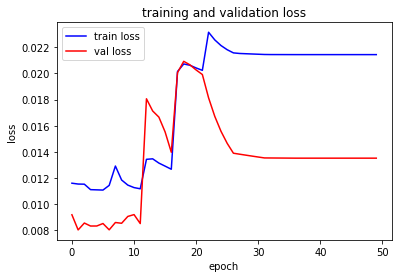

final val loss:  [0.009198649786412716, 0.008041047491133213, 0.008566733449697495, 0.008338418789207935, 0.00834084302186966, 0.008530307561159134, 0.008048351854085922, 0.008608099073171616, 0.008548660203814507, 0.0090720783919096, 0.009212330915033817, 0.008527196943759918, 0.018067073076963425, 0.0171341672539711, 0.016665488481521606, 0.015536477789282799, 0.01397724635899067, 0.020066415891051292, 0.02093125879764557, 0.02066146768629551, 0.020268337801098824, 0.019922900944948196, 0.01814235933125019, 0.016721168532967567, 0.015580606646835804, 0.01465744711458683, 0.013905082829296589, 0.013830350711941719, 0.013756824657320976, 0.013684681616723537, 0.013613861054182053, 0.013544348068535328, 0.013540912419557571, 0.013537444174289703, 0.01353398896753788, 0.01353051234036684, 0.013527085073292255, 0.01352705992758274, 0.013527044095098972, 0.013527022674679756, 0.013527005910873413, 0.01352698728442192, 0.01352698728442192, 0.01352698728442192, 0.01352698728442192, 0.0135269

In [121]:
# visualize the losses 

def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='train loss')
    plt.plot(epochs, val_loss, 'r', label='val loss')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('final val loss: ', val_loss)

visualize_loss(history, 'training and validation loss')

In [145]:
dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length = sequence_length,
    sampling_rate = step,
    batch_size = BATCH_SIZE
)

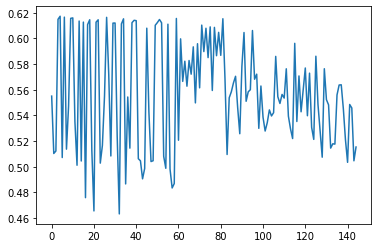

In [178]:
test_predictions = model.predict(dataset_test).flatten()
plt.plot(test_predictions)

## add labels


prediction: [[0.5550831]]
truth: [0.33684211]


ValueError: x and y must have same first dimension, but have shapes (1,) and (3240,)

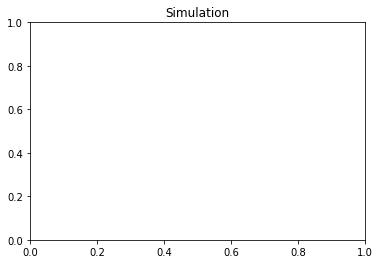

In [187]:
def show_plot(plot_data, delta, title):
    labels = ["Observation", "True Value", "Model Simulation"]
    marker = ["-", "x", "."]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=6, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
            
    plt.legend()
    plt.xlim([time_steps[0], (future + 5)])
    plt.xlabel("Time-Step")
    plt.show()
    return

for x, y in dataset_test.take(5):
    prediction = model.predict(x)
    print('prediction:', prediction)
    print('truth:', y[0].numpy())
    show_plot(
        [x.numpy(), prediction],
        12,
        "Simulation",
    )
   # show_plot(
   #     [x[0][:, 1].numpy(), y[0], prediction],
   #     12,
   #     "Simulation",
    

In [131]:
forecast = []
results = []
for time in range(len(y_val) - sequence_length):
    forecast.append(model.predict(y_val[time:time + sequence_length][np.newaxis]))

forecast = forecast[train_split - sequence_length:]
results = np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plot_series(val_data, x_val)
plot_series(val_data, results)


KeyError: None

Original Model Structure

In [167]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics = [tf.keras.metrics.MeanAbsoluteError()])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 120, 27)]         0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                7680      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 7,713
Trainable params: 7,713
Non-trainable params: 0
_________________________________________________________________


In [168]:
path_checkpoint = "model_checkpoint.h5"
#es_callback = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", min_delta=0, patience=5) # EarlyStopping
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, min_delta =0) # EarlyStopping min_delts or mode='min'

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


In [169]:
history = model.fit(
    dataset_train,
    epochs=10,
    validation_data = dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
13154/13154 [==============================] - 402s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0640 - val_loss: 0.0047 - val_mean_absolute_error: 0.0514

Epoch 00001: val_loss improved from inf to 0.00472, saving model to model_checkpoint.h5
Epoch 2/10
13154/13154 [==============================] - 399s 30ms/step - loss: 0.0070 - mean_absolute_error: 0.0596 - val_loss: 0.0051 - val_mean_absolute_error: 0.0555

Epoch 00002: val_loss did not improve from 0.00472
Epoch 3/10
13154/13154 [==============================] - 411s 31ms/step - loss: 0.0067 - mean_absolute_error: 0.0582 - val_loss: 0.0040 - val_mean_absolute_error: 0.0472

Epoch 00003: val_loss improved from 0.00472 to 0.00405, saving model to model_checkpoint.h5
Epoch 4/10
12535/13154 [===========================>..] - ETA: 17s - loss: 0.0066 - mean_absolute_error: 0.0576

KeyboardInterrupt: 

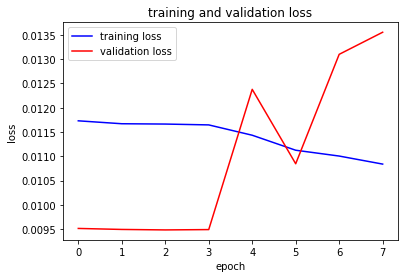

final val loss:  [0.009512970224022865, 0.009492355398833752, 0.00948254857212305, 0.009489435702562332, 0.012379507534205914, 0.010846157558262348, 0.013100948184728622, 0.013556290417909622]


In [ ]:
# visualize the losses 

def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='training loss')
    plt.plot(epochs, val_loss, 'r', label='validation loss')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('final val loss: ', val_loss)

visualize_loss(history, 'training and validation loss')

In [ ]:
# create tf_data_Dataset

dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sequence_stride=int(sequence_length * 6),
    sampling_rate=step,
    batch_size=1,
)

In [ ]:
print(dataset_test)

for batch in dataset_test.take(1):
    inputs, targets = batch
print('input shape', inputs.numpy().shape)
print('target shape', targets.numpy().shape)

<BatchDataset shapes: ((None, None, 27), (None, 1)), types: (tf.float64, tf.float64)>
input shape (1, 120, 27)
target shape (1, 1)


prediction: [[0.27091533]
 [0.27195913]
 [0.27390137]
 [0.2741467 ]
 [0.2741668 ]
 [0.27414608]
 [0.27412638]
 [0.27407867]
 [0.27405214]
 [0.27402627]
 [0.27402136]
 [0.27399814]
 [0.27395347]
 [0.2739292 ]
 [0.27391884]
 [0.27390426]
 [0.2738832 ]
 [0.27385914]
 [0.27382785]
 [0.2738022 ]
 [0.2737577 ]
 [0.27373254]
 [0.2737237 ]
 [0.27370057]
 [0.2736772 ]
 [0.27366018]
 [0.27363688]
 [0.27360716]
 [0.27356157]
 [0.27353644]
 [0.27353093]
 [0.2735098 ]
 [0.27348554]
 [0.27343702]
 [0.27341428]
 [0.27340832]
 [0.27338982]
 [0.27336457]
 [0.27331775]
 [0.2732929 ]
 [0.27326912]
 [0.27326068]
 [0.27323836]
 [0.27321336]
 [0.27318823]
 [0.27317238]
 [0.27315173]
 [0.27310485]
 [0.27308023]
 [0.27305713]
 [0.2730423 ]
 [0.27303112]
 [0.27298924]
 [0.27296248]
 [0.27295187]
 [0.27293497]
 [0.27291942]
 [0.272899  ]
 [0.27287704]
 [0.27285147]
 [0.27280915]
 [0.27278563]
 [0.27277398]
 [0.27275768]
 [0.2727348 ]
 [0.27271295]
 [0.2726975 ]
 [0.27267647]
 [0.27262956]
 [0.27260375]
 [0.2725

ValueError: x and y must have same first dimension, but have shapes (1,) and (120, 1)

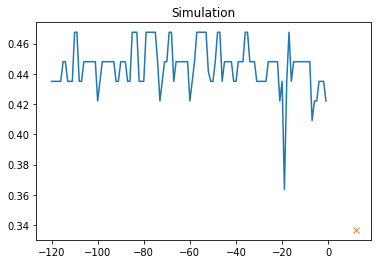

In [ ]:
#Prediction

# The trained model above is now able to make predictions for 5 sets of values from validation set.

def show_plot(plot_data, delta, title):
    labels = ["Observation", "True Value", "Model Simulation"]
    marker = ["-", "x", "."]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=6, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
            
    plt.legend()
    plt.xlim([time_steps[0], (future + 5)])
    plt.xlabel("Time-Step")
    plt.show()
    return

for x, y in dataset_test.take(5):
    prediction = model.predict(x)
    prediction = prediction[0]
    print('prediction:', prediction)
    print('truth:', y[0].numpy())
    show_plot(
        [x[0][:, 1].numpy(), y[0], prediction],
        12,
        "Simulation",
    )